Loading in datasets and libraries

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import pandas as pd
import datetime,os
from tqdm.auto import tqdm
import pickle 
import matplotlib.pyplot as plt
from collections import Counter 

###

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.layers import Embedding, Dropout#, Activation
from tensorflow.keras.layers import GRU, Flatten, Bidirectional 
from tensorflow.keras.layers import GlobalMaxPool1D, Convolution1D

from tensorflow.keras.models import Sequential, Model

In [3]:
#Home dirs do not work, not enough ram
"""
train_dir = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/train"
test_dir = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/test"

train_pos = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/train/pos"
train_neg = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/train/neg"

test_pos = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/test/pos"
test_neg = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/test/neg"

print(os.path.isdir(train_dir))
print(os.path.isdir(test_dir))
"""

'\ntrain_dir = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/train"\ntest_dir = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/test"\n\ntrain_pos = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/train/pos"\ntrain_neg = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/train/neg"\n\ntest_pos = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/test/pos"\ntest_neg = "/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb/test/neg"\n\nprint(os.path.isdir(train_dir))\nprint(os.path.isdir(test_dir))\n'

## Loading data into arrays

In [4]:
#Run only once
'''

dir_name = ["test","train"]
categories = ["pos","neg"]

array_test_data = []
array_train_data = []
for name in dir_name:
    dir_path = os.path.join("/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb",name)
    for category in categories:
        path = os.path.join(dir_path,category)
        print(path)
        categorical = categories.index(category)
        print("Category: ",categorical)
        for files in tqdm(sorted(os.listdir(path))):
            try:
                if files.endswith(".txt"):
                    if dir_path.endswith("test"):
                        with open(os.path.join(path,files)) as f:
                            array_test_data.append([f.read(),categorical])
                        #print(test_data)
                    elif dir_path.endswith("train"):
                        with open(os.path.join(path,files)) as f:
                            array_train_data.append([f.read(),categorical])
                        #print(train_data)
            except exception as e:
                print(e)
                pass

    
#<br /><br />
import pickle 

train_path = '/home/maxwell/Documents/jupyternotebook/RNNs/Pickles/train_data.pickle'
test_path = '/home/maxwell/Documents/jupyternotebook/RNNs/Pickles/test_data.pickle'

with open(train_path,'wb') as f:
  print(f)
  pickle.dump(array_train_data,f)
    
with open(test_path,'wb') as f:
    print(f)
    pickle.dump(array_test_data,f)
'''

'\n\ndir_name = ["test","train"]\ncategories = ["pos","neg"]\n\narray_test_data = []\narray_train_data = []\nfor name in dir_name:\n    dir_path = os.path.join("/home/maxwell/Documents/Datasets/aclImdb_v1/aclImdb",name)\n    for category in categories:\n        path = os.path.join(dir_path,category)\n        print(path)\n        categorical = categories.index(category)\n        print("Category: ",categorical)\n        for files in tqdm(sorted(os.listdir(path))):\n            try:\n                if files.endswith(".txt"):\n                    if dir_path.endswith("test"):\n                        with open(os.path.join(path,files)) as f:\n                            array_test_data.append([f.read(),categorical])\n                        #print(test_data)\n                    elif dir_path.endswith("train"):\n                        with open(os.path.join(path,files)) as f:\n                            array_train_data.append([f.read(),categorical])\n                        #print(trai

## Loading in data from pickle

In [5]:
import pickle 

train_path = '/content/drive/My Drive/Datasets and Pickles/Datasets/IMDB Raw/train_data.pickle'
test_path = '/content/drive/My Drive/Datasets and Pickles/Datasets/IMDB Raw/test_data.pickle'

with open(train_path,'rb') as f:
  train_data = pickle.load(f)
print("This is the train data: \n" , train_data[0])

print("\n")

with open(test_path,'rb') as f:
  test_data = pickle.load(f)
print("This is the test data: \n" , test_data[0]) 

This is the train data: 
 ['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!', 0]


This is the test data: 
 ["I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it 

## Label, Feature separation and length collection

In [0]:
X = []
Y = []

for i,j in train_data:
    X.append(i)
    Y.append(j)

In [7]:
len_X = []

for i in X:
    len_X.append(len(i))
np.asarray(len_X)

array([ 806, 2366,  841, ..., 1688, 1277,  746])

In [0]:
X_t = []
Y_t = []

for i,j in test_data:
    X_t.append(i)
    Y_t.append(j)

In [9]:
len_X_t = []

for i in X_t:
    len_X_t.append(len(i))
np.asarray(len_X_t)

array([ 794, 2004, 1434, ..., 1623,  749, 2284])

In [0]:
test_df = np.asarray(test_data)
test_df = pd.DataFrame(test_df)
test_df["Len_samples"] = len_X_t

test_df = test_df.rename(columns={0: "Text", 1: "Labels"})


train_df = np.asarray(train_data)
train_df = pd.DataFrame(train_df)
train_df["Len_samples"] = len_X

train_df = train_df.rename(columns={0: "Text", 1: "Labels"})

In [11]:
test_df.sort_values(by=['Len_samples'],ascending=False)

,Text,Labels,Len_samples
10995,There's a sign on The Lost Highway that says:<...,0,12988
5612,"(Some spoilers included:)<br /><br />Although,...",0,12930
5890,"Back in the mid/late 80s, an OAV anime by titl...",0,12129
9776,If anyone ever assembles a compendium on moder...,0,9951
5785,"Films belonging to the ""film noir"" genre usual...",0,8111
...,...,...,...
23467,"More suspenseful, more subtle, much, much more...",1,61
19607,Primary plot!Primary direction!Poor interpreta...,1,51
17466,I hope this group of film-makers never re-unites.,1,49
21705,"What a script, what a story, what a mess!",1,41


In [12]:
train_df.sort_values(by=['Len_samples'],ascending=False)

,Text,Labels,Len_samples
1954,Match 1: Tag Team Table Match Bubba Ray and Sp...,0,13704
6258,**Attention Spoilers**<br /><br />First of all...,0,10363
49,Titanic directed by James Cameron presents a f...,0,10321
5917,By now you've probably heard a bit about the n...,0,9420
4346,*!!- SPOILERS - !!*<br /><br />Before I begin ...,0,9345
...,...,...,...
6408,Adrian Pasdar is excellent is this film. He ma...,0,70
16854,You'd better choose Paul Verhoeven's even if y...,1,65
14807,Ming The Merciless does a little Bardwork and ...,1,64
16479,I wouldn't rent this one even on dollar rental...,1,53


## Analyzing Data

In [13]:
from scipy.stats import iqr

iqr(train_df["Len_samples"])

912.0

In [14]:
train_df["Labels"].value_counts()

0    12500
1    12500
Name: Labels, dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         25000 non-null  object
 1   Labels       25000 non-null  object
 2   Len_samples  25000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [16]:
train_df.describe()

,Len_samples
count,25000.00000
mean,1325.06964
std,1003.13367
min,52.00000
25%,702.00000
50%,979.00000
75%,1614.00000
max,13704.00000


Listing out indicies and the length of each sample in largest order:

In [17]:
train_df["Len_samples"].nlargest(4324, keep="all") #The 4323 sample(s) is less than 2000 in length

1954     13704
6258     10363
49       10321
5917      9420
4346      9345
         ...  
17783     2002
19922     2002
12018     2001
3008      2000
20444     2000
Name: Len_samples, Length: 4324, dtype: int64

In [0]:
#print(train_df["Text"][1954])

In [19]:
#Run only once
'''
listed_test_data = list(X)

X_freq = []
X_freq.append(listed_test_data[0])

for i in tqdm(range(1,len(X)) ):
    X_freq[0] += listed_test_data[i]

import pickle 

X_freq_path = '/home/maxwell/Documents/jupyternotebook/RNNs/Pickles/X_freq.pickle'

with open(X_freq_path,'wb') as f:
  print(f)
  pickle.dump(X_freq,f)
'''

"\nlisted_test_data = list(X)\n\nX_freq = []\nX_freq.append(listed_test_data[0])\n\nfor i in tqdm(range(1,len(X)) ):\n    X_freq[0] += listed_test_data[i]\n\nimport pickle \n\nX_freq_path = '/home/maxwell/Documents/jupyternotebook/RNNs/Pickles/X_freq.pickle'\n\nwith open(X_freq_path,'wb') as f:\n  print(f)\n  pickle.dump(X_freq,f)\n"

Graphing a bar chart of the most common words:

This is the data: 
 Bromwell High is a cartoon com  ...


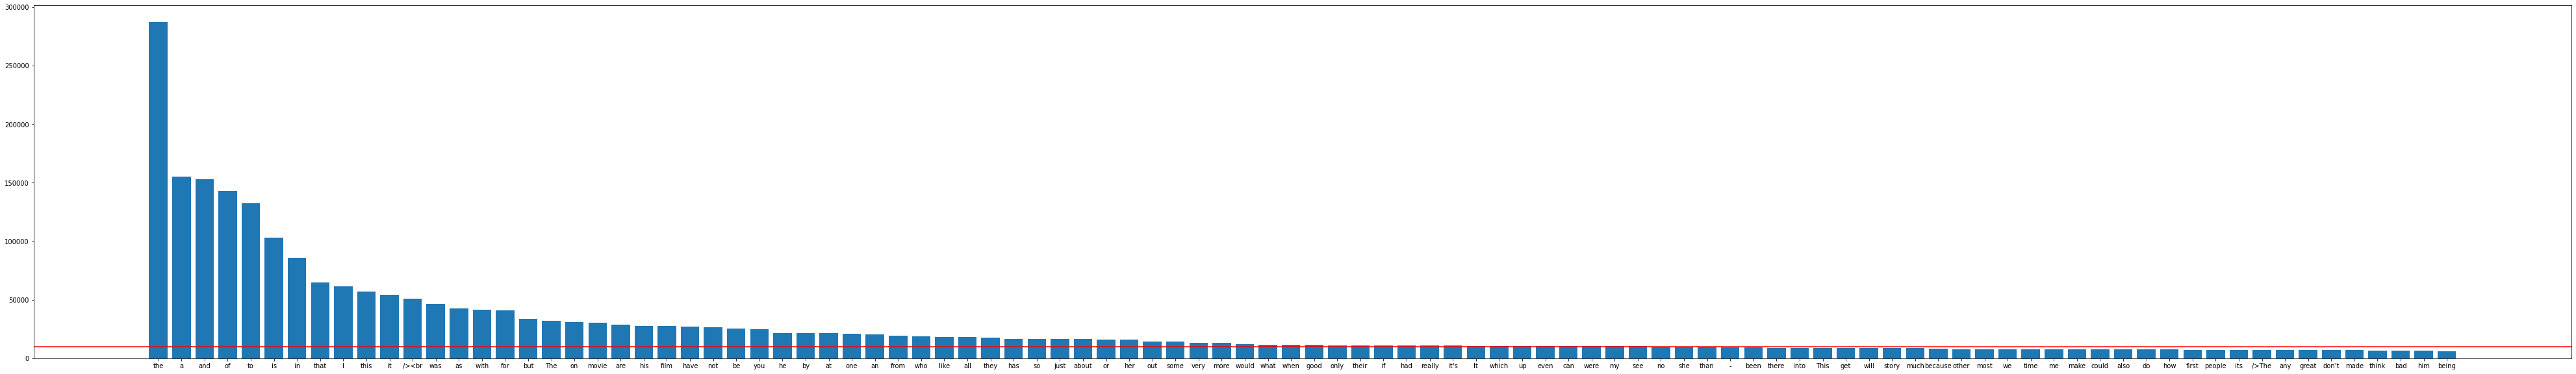

In [20]:
import pickle 

X_freq_path = '/content/drive/My Drive/Datasets and Pickles/Datasets/IMDB Raw/X_freq.pickle'

with open(X_freq_path,'rb') as f:
  X_freq = pickle.load(f)
print("This is the data: \n" , X_freq[0][0:30]," ...") 

###

split_it = X_freq[0].split() #By default splits by whitespace
Counter = Counter(split_it)
most_occur = Counter.most_common(100) #The top 100 most common words
#print(most_occur) 

dictionary = dict(most_occur)

plt.figure(figsize=(70,10))
plt.bar(list(dictionary.keys()), dictionary.values())
plt.axhline(y=10000, color='r', linestyle='-')
plt.show()
#plt.savefig("MostCommonWords.png") #Doesn't work

In [21]:
dictionary

{'-': 9341,
 '/><br': 50937,
 '/>The': 7266,
 'I': 61520,
 'It': 10697,
 'The': 32298,
 'This': 8866,
 'a': 155088,
 'about': 16285,
 'all': 18045,
 'also': 7422,
 'an': 20623,
 'and': 152651,
 'any': 7231,
 'are': 28498,
 'as': 42504,
 'at': 21293,
 'bad': 6504,
 'be': 25510,
 'because': 8355,
 'been': 9049,
 'being': 6201,
 'but': 33784,
 'by': 21423,
 'can': 10559,
 'could': 7462,
 'do': 7405,
 "don't": 7002,
 'even': 10606,
 'film': 27392,
 'first': 7337,
 'for': 41062,
 'from': 19237,
 'get': 8776,
 'good': 11431,
 'great': 7188,
 'had': 10874,
 'has': 16472,
 'have': 27125,
 'he': 21674,
 'her': 15829,
 'him': 6347,
 'his': 27686,
 'how': 7399,
 'if': 10893,
 'in': 85574,
 'into': 8950,
 'is': 103226,
 'it': 54414,
 "it's": 10719,
 'its': 7318,
 'just': 16322,
 'like': 18133,
 'made': 6961,
 'make': 7485,
 'me': 7535,
 'more': 12948,
 'most': 7858,
 'movie': 30483,
 'much': 8507,
 'my': 10162,
 'no': 10059,
 'not': 26263,
 'of': 142970,
 'on': 30765,
 'one': 20678,
 'only': 11105

#Finding rankings of certain words

Good: 50th most used word


Bad: 97th most used word

In [22]:
len(dictionary) #Getting # of words

100

In [23]:
X_freq[0].count("good")

14775

In [0]:
df = pd.DataFrame(dictionary,index=[0])

In [25]:
df.columns.get_loc("good")#50th most used word

50

In [26]:
df.columns.get_loc("bad")#97th most used word

97

In [27]:
d = tuple(dictionary)
print(d[:].index("bad"))

97


#Removing stop words

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stop words:

'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'

Note that only lower case stopwords are only removed

In [29]:
'''
X_copy = X.copy()

def remove_stop_words(data):
  
  temp = []
  
  for text in data:
    #print("This is the text: ",text)
    #print(" ")
    tempk = []
    for w in text.split():
      if w not in stop_words:
        tempk.append(w)

    temp.append(tempk)
    
  return temp

def combineterms(data):
  for i,j in enumerate(data):
    data[i] = ' '.join(data[i])

  return data
  '''

'\nX_copy = X.copy()\n\ndef remove_stop_words(data):\n  \n  temp = []\n  \n  for text in data:\n    #print("This is the text: ",text)\n    #print(" ")\n    tempk = []\n    for w in text.split():\n      if w not in stop_words:\n        tempk.append(w)\n\n    temp.append(tempk)\n    \n  return temp\n\ndef combineterms(data):\n  for i,j in enumerate(data):\n    data[i] = \' \'.join(data[i])\n\n  return data\n  '

In [0]:
final = X.copy()

In [0]:
maxlen = 2000 #Limit len of text to 2000
max_words = 30000 #Limit to only the top 20000 words used at the minimum

tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(final) #Creating a word index
sequences = tokenizer.texts_to_sequences(final) #String into lists of integer indicies

one_hot_results = tokenizer.texts_to_matrix(final, mode='binary') #Onehot encoded

data = pad_sequences(sequences, maxlen=maxlen) #padding the sequence to be 2000 words

In [32]:
word_index = tokenizer.word_index #Recovers the index dictionary
print(word_index) #Printing the indexed dictionary                 

print('Found {} unique tokens.'.format(len(word_index))) #Prints each of the tokens

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'has': 44, 'if': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'she': 56, 'even': 57, 'my': 58, 'would': 59, 'which': 60, 'only': 61, 'story': 62, 'really': 63, 'see': 64, 'their': 65, 'had': 66, 'can': 67, 'were': 68, 'me': 69, 'well': 70, 'than': 71, 'we': 72, 'much': 73, 'been': 74, 'bad': 75, 'get': 76, 'will': 77, 'do': 78, 'also': 79, 'into': 80, 'people': 81, 'other': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 87, 'most': 88, "don't":

#Embeddings

Pulling in glove word embeddings

In [0]:
embeddings_dir = "/content/drive/My Drive/glove.txt"

In [34]:
embeddings_index = {} #Word and vector dictionary
with open(embeddings_dir,"r") as f:
  for line in f:
      values = line.split() #split by line 
      word = values[0] #First value of the line is the word 
      coefs = np.asarray(values[1:], dtype='float32') #After the first word, every number is considered a vector for the word
      embeddings_index[word] = coefs #Index at the given word is assigned its vector


print('Found %s word vectors.' % len(embeddings_index))

Found 1917495 word vectors.


In [0]:
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word) #checking if the word from the index is in the embedding index
    if embedding_vector is not None:
      # words not found in embedding index will be all-zeros
      embedding_matrix[i] = embedding_vector #assigning the index to the vector intelligently

For functional API

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)

# Model

In [0]:
x_t = np.asarray(data)
y_t = np.asarray(Y)

indicies = np.arange(x_t.shape[0]) 
np.random.shuffle(indicies)

x_t = x_t[indicies]
y_t = y_t[indicies]

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D, Conv1D
from tensorflow.keras import regularizers, layers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(200, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(26, activation="relu",kernel_regularizer = regularizers.l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(8,activation="relu",kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu",kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.05))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 300)         9000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 1996, 200)         300200    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 998, 200)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 998, 64)           59648     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['mse','acc'])

In [0]:
date =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [40]:
def k_fold(xdata,ydata,folds,epochs,size):
  k = folds
  intervalfolds = int(len(xdata)//k)

  print(len(xdata))
  print("Interval folds: ",intervalfolds)
  for i in range(k):
    
    print("Validating on fold: " , (i+1))

    val_data = xdata[intervalfolds* i:(intervalfolds*(i+1))]

    val_targets = ydata[intervalfolds*i : (intervalfolds*(i+1))]

    part_data = np.concatenate([ xdata[:(i * intervalfolds)], xdata[((i + 1) * intervalfolds):] ] ,axis=0)

    part_targets = np.concatenate([ydata[:i * intervalfolds], ydata[(i + 1) * intervalfolds:]] ,axis=0)

    history = model.fit(part_data, part_targets, 
                            validation_data=(val_data, val_targets),
                            epochs = epochs, 
                            batch_size = size)

    
    model.save('/content/drive/My Drive/glove_modelNOSTOP.h5')


k_fold(x_t,y_t,5,4,500)

25000
Interval folds:  5000
Validating on fold:  1
Epoch 1/4
40/40 [==============================] - 819s 20s/step - loss: 1.0997 - mse: 0.2274 - acc: 0.6214 - val_loss: 0.8482 - val_mse: 0.1451 - val_acc: 0.8324
Epoch 2/4
40/40 [==============================] - 821s 21s/step - loss: 0.7695 - mse: 0.1357 - acc: 0.8279 - val_loss: 0.6584 - val_mse: 0.1081 - val_acc: 0.8552
Epoch 3/4
40/40 [==============================] - 821s 21s/step - loss: 0.5870 - mse: 0.0937 - acc: 0.8868 - val_loss: 0.5663 - val_mse: 0.0977 - val_acc: 0.8696
Epoch 4/4
40/40 [==============================] - 827s 21s/step - loss: 0.4641 - mse: 0.0682 - acc: 0.9226 - val_loss: 0.4679 - val_mse: 0.0780 - val_acc: 0.8976
Validating on fold:  2
Epoch 1/4
40/40 [==============================] - 818s 20s/step - loss: 0.4210 - mse: 0.0660 - acc: 0.9253 - val_loss: 0.3207 - val_mse: 0.0397 - val_acc: 0.9498
Epoch 2/4
40/40 [==============================] - 814s 20s/step - loss: 0.3467 - mse: 0.0507 - acc: 0.9449 - v

#Evaluating Model

In [0]:
X_test = test_df["Text"]
Y_test = [int(i) for i in test_df["Labels"]]
Y_test = np.asarray(Y_test).astype(np.float32)

In [42]:
'''
X_copy = X_test.copy()

def remove_stop_words(data):
  
  temp = []
  
  for text in data:
    #print("This is the text: ",text)
    #print(" ")
    tempk = []
    for w in text.split():
      if w not in stop_words:
        tempk.append(w)

    temp.append(tempk)
    
  return temp

def combineterms(data):
  for i,j in enumerate(data):
    data[i] = ' '.join(data[i])

  return data
final_test = combineterms(remove_stop_words(X_copy))
'''

'\nX_copy = X_test.copy()\n\ndef remove_stop_words(data):\n  \n  temp = []\n  \n  for text in data:\n    #print("This is the text: ",text)\n    #print(" ")\n    tempk = []\n    for w in text.split():\n      if w not in stop_words:\n        tempk.append(w)\n\n    temp.append(tempk)\n    \n  return temp\n\ndef combineterms(data):\n  for i,j in enumerate(data):\n    data[i] = \' \'.join(data[i])\n\n  return data\nfinal_test = combineterms(remove_stop_words(X_copy))\n'

In [0]:
#X_copy[0]

In [0]:
#final_test[0]

In [0]:
final_test=X_test.copy()

In [0]:
maxlen = 2000 #Limit len of text to 2000
max_words = 30000 #Limit to only the top 20000 words used at the minimum

tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(final_test) #Creating a word index
sequences = tokenizer.texts_to_sequences(final) #String into lists of integer indicies

one_hot_results = tokenizer.texts_to_matrix(final_test, mode='binary') #Onehot encoded

data_test = pad_sequences(sequences, maxlen=maxlen) #padding the sequence to be 2000 words

In [51]:
word_index = tokenizer.word_index #Recovers the index dictionary
print(word_index) #Printing the indexed dictionary                 

print('Found {} unique tokens.'.format(len(word_index))) #Prints each of the tokens

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'i': 9, 'it': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'movie': 15, 'with': 16, 'for': 17, 'but': 18, 'film': 19, 'on': 20, 'you': 21, 'not': 22, 'are': 23, 'his': 24, 'have': 25, 'one': 26, 'be': 27, 'he': 28, 'at': 29, 'all': 30, 'by': 31, 'an': 32, 'they': 33, 'so': 34, 'who': 35, 'from': 36, 'like': 37, 'or': 38, 'just': 39, 'if': 40, 'out': 41, 'about': 42, 'her': 43, "it's": 44, 'has': 45, 'there': 46, 'some': 47, 'what': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'up': 53, 'no': 54, 'my': 55, 'time': 56, 'even': 57, 'would': 58, 'she': 59, 'see': 60, 'their': 61, 'really': 62, 'which': 63, 'only': 64, 'story': 65, 'can': 66, 'had': 67, 'me': 68, 'well': 69, 'were': 70, 'much': 71, 'than': 72, 'we': 73, 'bad': 74, 'great': 75, 'get': 76, 'been': 77, 'do': 78, 'other': 79, 'will': 80, 'also': 81, 'into': 82, 'people': 83, 'how': 84, 'him': 85, 'because': 86, 'most': 87, 'first': 88, "don't":

In [52]:
from tensorflow.keras import models

model = models.load_model('/content/drive/My Drive/glove_modelNOSTOP.h5')

model.evaluate(data_test,Y_test)

782/782 [==============================] - 317s 405ms/step - loss: 2.2142 - mean_squared_error: 0.4508 - acc: 0.4978


[2.2141621112823486, 0.45079925656318665, 0.49775999784469604]